<a href="https://colab.research.google.com/github/snehasaini21/HR-Analytics-dashboard/blob/main/Predictive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


**Import the required libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading of the file of given dataset**

In [4]:
data = pd.read_csv('winequality-red.csv')

**Visualization of top 10 records inside my data**

In [5]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Classes of target value**

In [6]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

**Description of the given dataset**

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**To check the missing values**

In [8]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**Correlation matrix among all features inside the dataset**

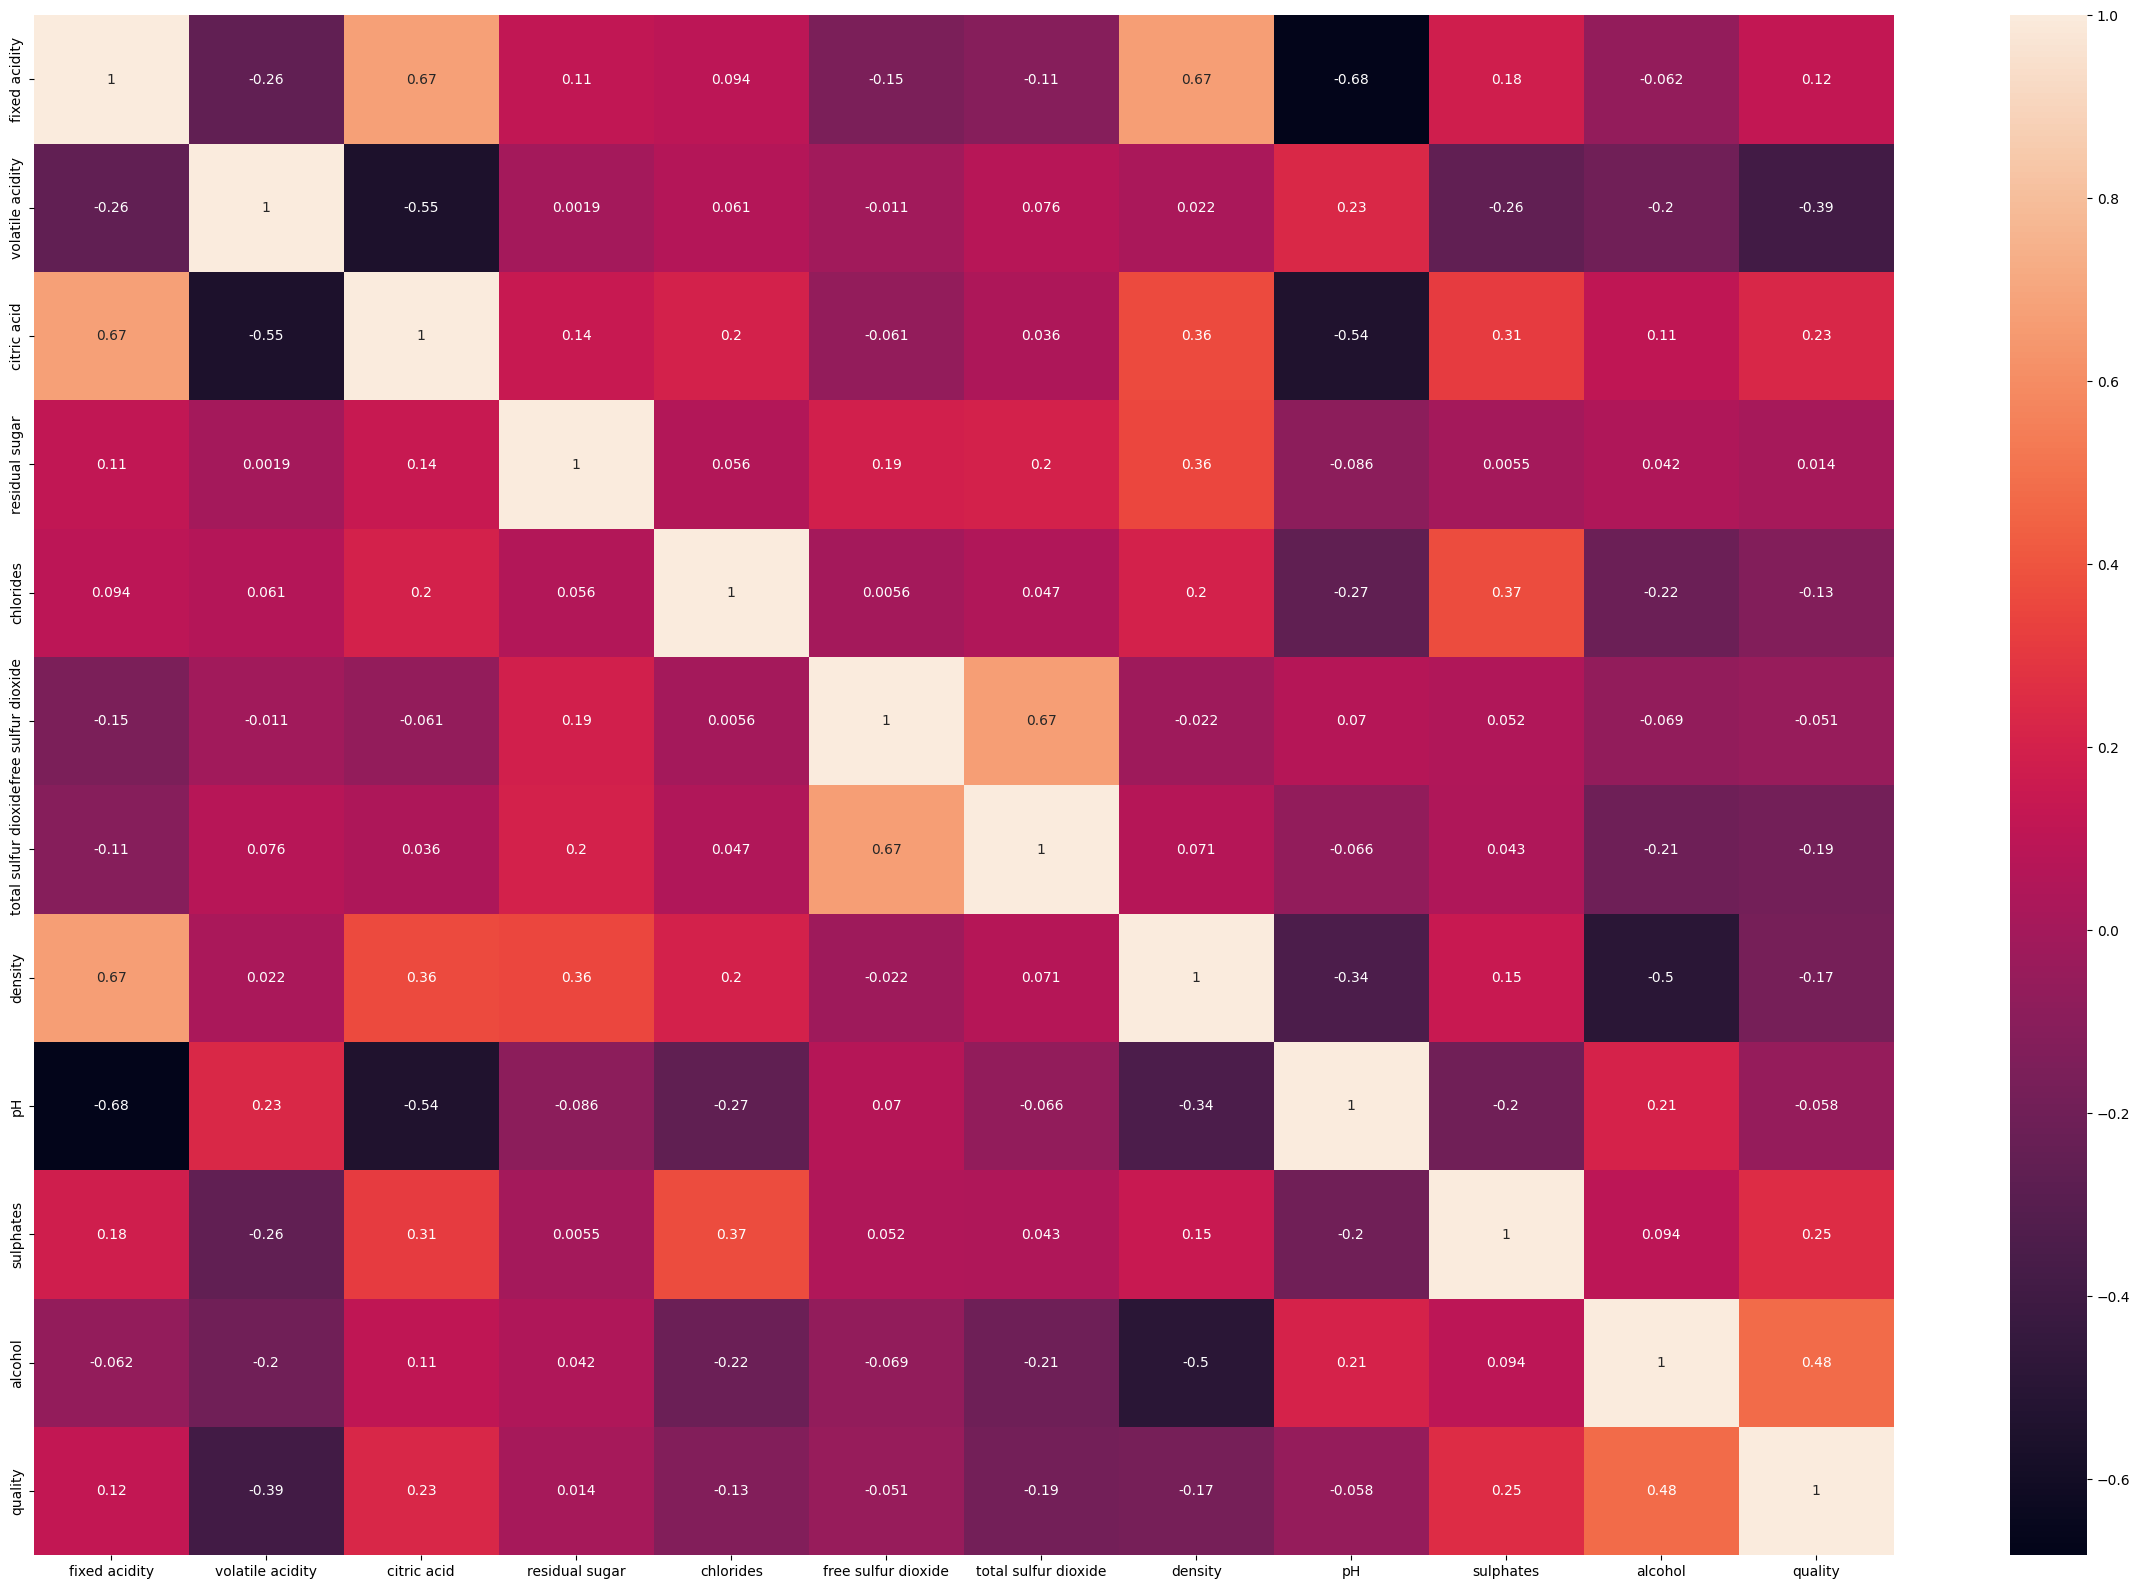

In [9]:
plt.figure(figsize=(30,20))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

**Detection of outliers using z-score**

In [10]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


**3(Threshold) -> This is an outlier**

In [11]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

**Remove those records whose z>3(outlier)**

In [13]:
new_data = data[(z<3).all(axis=1)]

In [14]:
new_data.shape

(1451, 12)

In [15]:
data.shape

(1599, 12)

**Data Splitting into features(X) and target column(y)**

In [16]:
from sklearn.model_selection import train_test_split
## X - input feature
X = new_data.drop('quality', axis=1)
## y - outcome
y = new_data['quality']


In [18]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [19]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Data Modeling using Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(n_estimators=100)
rf_classificationModel.fit(X_train, y_train)

RandomForestClassifier()

**Prediction of Data using Random Forest Model**

In [22]:
y_pred = rf_classificationModel.predict(X_test)

In [23]:
y_pred

array([5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 6, 6, 7, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 6, 5, 7, 6, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 7, 5,
       6, 5, 6, 5, 5, 6, 6, 7, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 7, 6, 5, 6, 7, 7, 5, 5, 5, 5, 5, 7, 7, 6, 5, 6, 5, 6, 6,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 5, 7, 7, 6, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 7, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       5, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 6, 5, 6, 7, 7, 6, 5, 6, 7, 5, 6, 6, 5, 6, 6, 7, 6, 5, 7, 5, 6,
       5, 5, 6, 7, 5, 6, 6, 7, 5, 5, 6, 6, 6, 8, 5, 6, 5, 6, 7, 5, 5, 6,
       6, 5, 5, 6, 7, 5, 5, 6, 7, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 5, 6,
       6, 7, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 4,
       6, 5, 6, 5, 5])

**Data Evaluation on Matrics**

In [24]:
from sklearn import metrics
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.7079037800687286


**Accuracy Score: 70.8%**

**1. Hyperparameter Tuning -> GridSearchCV**

[Text(0.558575358992467, 0.9736842105263158, 'x[9] <= 0.685\ngini = 0.645\nsamples = 731\nvalue = [45.0, 515.0, 433.0, 153.0, 14.0]'),
 Text(0.2988685852165725, 0.9210526315789473, 'x[7] <= 0.996\ngini = 0.591\nsamples = 510\nvalue = [41.0, 425.0, 289.0, 55.0, 1.0]'),
 Text(0.4287219721045198, 0.9473684210526316, 'True  '),
 Text(0.09781073446327683, 0.868421052631579, 'x[5] <= 12.5\ngini = 0.649\nsamples = 139\nvalue = [14, 73, 109, 32, 1]'),
 Text(0.033192090395480225, 0.8157894736842105, 'x[10] <= 10.35\ngini = 0.705\nsamples = 64\nvalue = [8, 36, 32, 25, 0]'),
 Text(0.007532956685499058, 0.7631578947368421, 'x[7] <= 0.995\ngini = 0.405\nsamples = 15\nvalue = [2, 15, 3, 0, 0]'),
 Text(0.003766478342749529, 0.7105263157894737, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(0.011299435028248588, 0.7105263157894737, 'x[0] <= 5.85\ngini = 0.29\nsamples = 13\nvalue = [2, 15, 1, 0, 0]'),
 Text(0.007532956685499058, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0

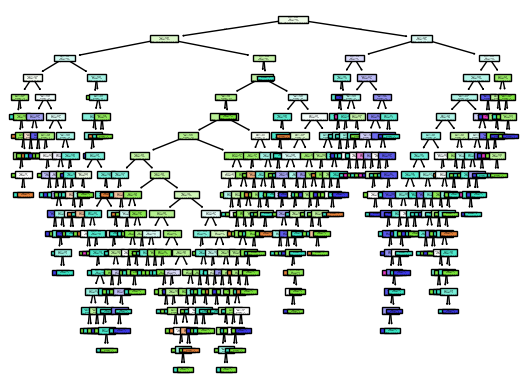

In [25]:
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled = True)

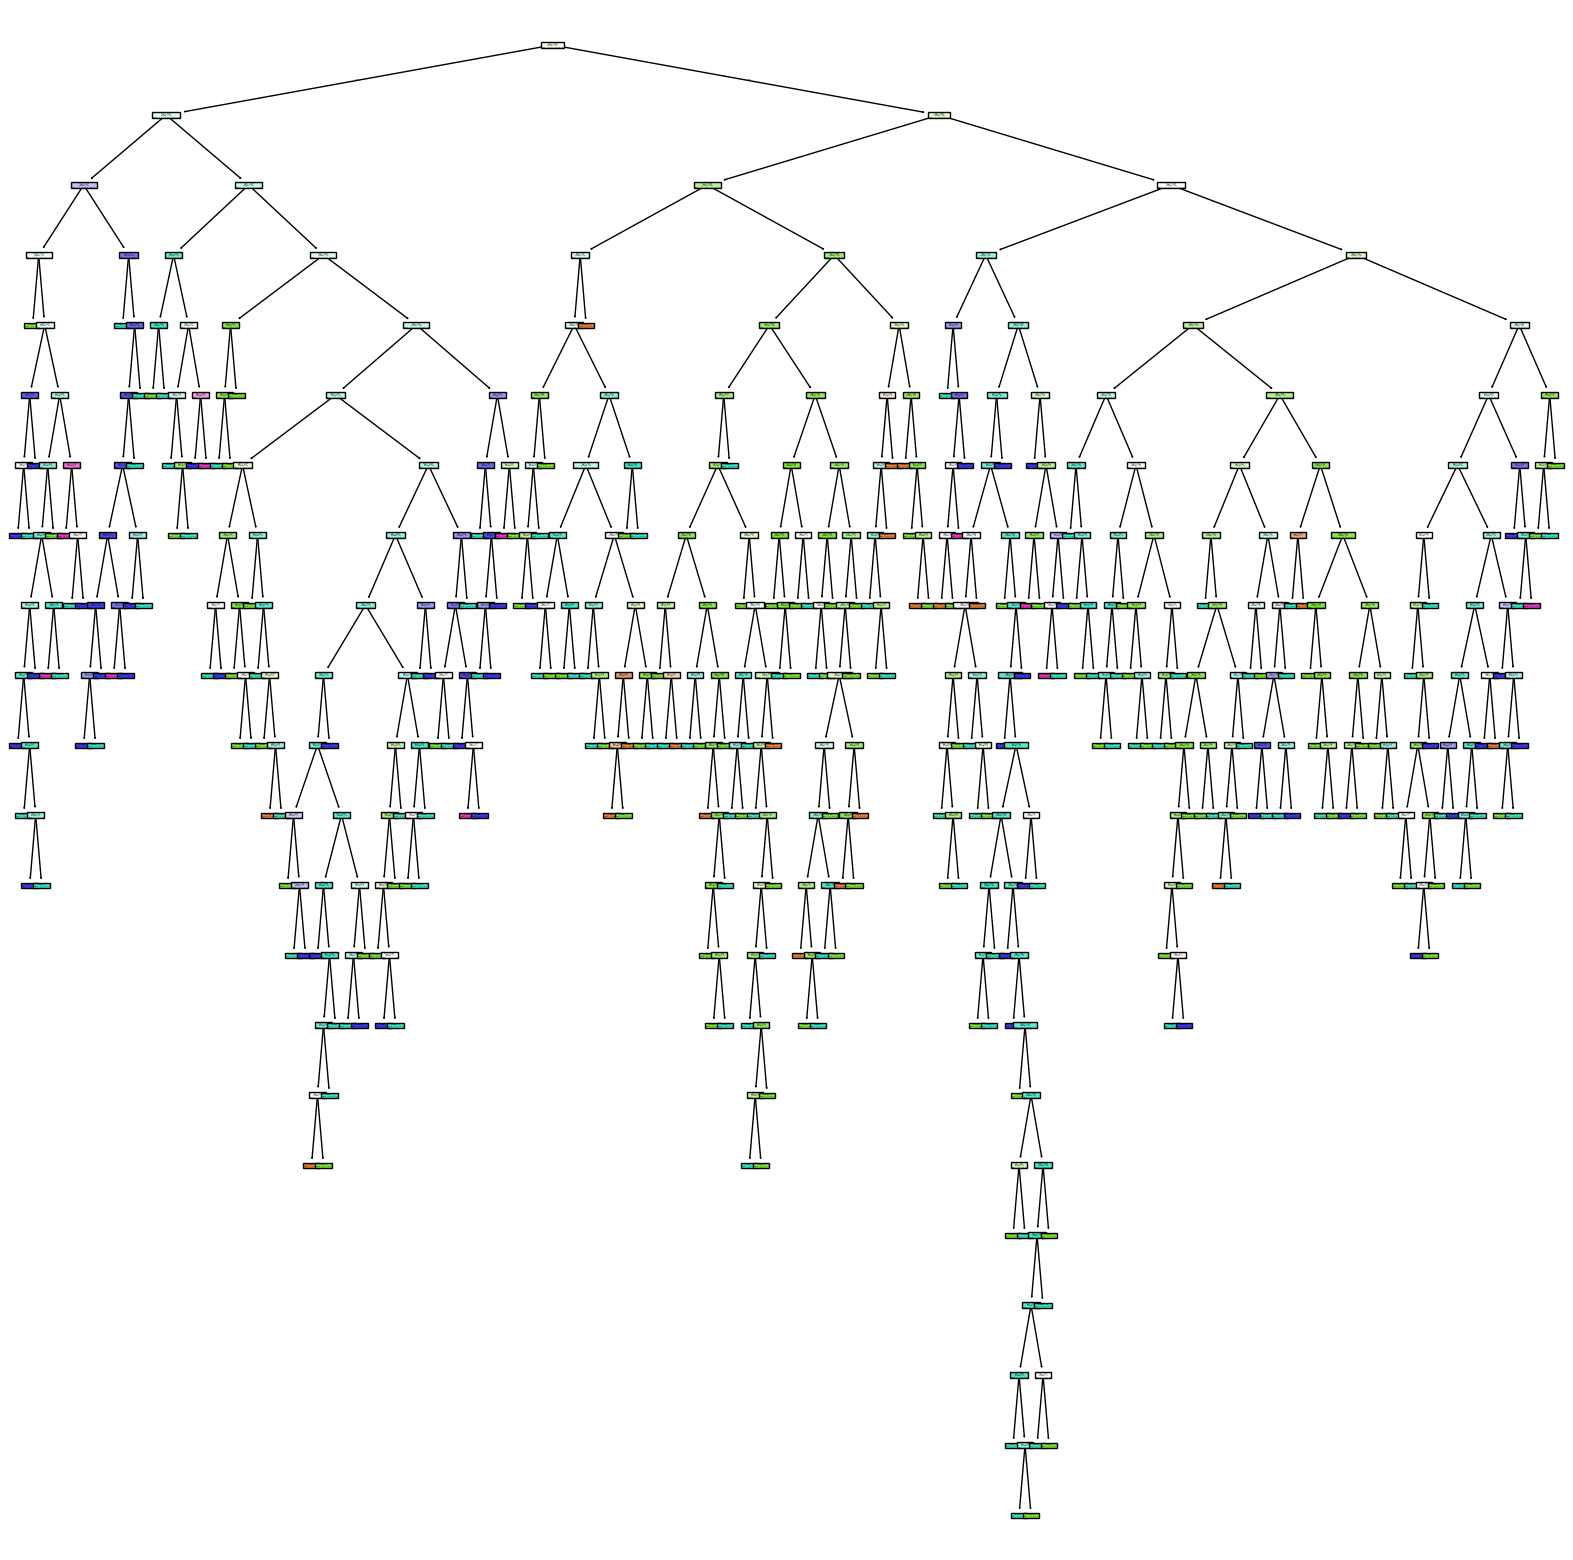

In [26]:
plt.figure(figsize=(20,20))
for i in range(len(rf_classificationModel.estimators_)):
  tree.plot_tree(rf_classificationModel.estimators_[i], filled = True)